In [1]:
import numpy as np
from alibi.explainers.pd_variance import PartialDependenceVariance, plot_pd_variance
from alibi.explainers import plot_pd

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

### Friedman's regression probelm

In [2]:
def generate_target(X: np.ndarray):
    return 10 * np.sin(np.pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5)**2 \
        + 10 * X[:, 4] + 5 * X[:, 5] + np.random.randn(len(X))

np.random.seed(0)
X = np.random.rand(1000, 10)
y = generate_target(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train MLP regressor

In [3]:
# train MLP regressor on data
nn = MLPRegressor(max_iter=10000).fit(X_train, y_train)
print("Train score: %.3f" % (nn.score(X_train, y_train)))
print("Test score: %.3f" % (nn.score(X_test, y_test)))

Train score: 0.964
Test score: 0.933


### Define explainer

In [4]:
# define explainer
explainer = PartialDependenceVariance(predictor=nn.predict, verbose=True)

### Feature importance

In [13]:
exp = explainer.explain(X=X_train,
                        features=None,
                        method='importance',
                        grid_resolution=50)

100%|██████████| 10/10 [00:00<00:00, 69.13it/s]


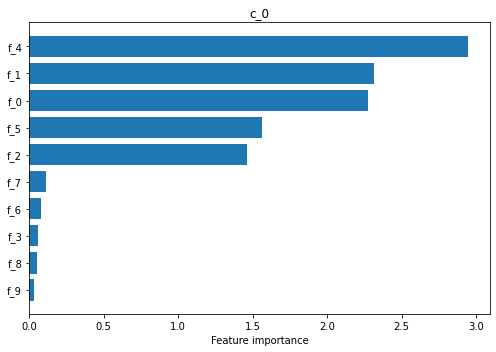

In [14]:
# plot summary
plot_pd_variance(exp=exp,
                 features='all',
                 fig_kw={'figwidth': 7, 'figheight': 5});

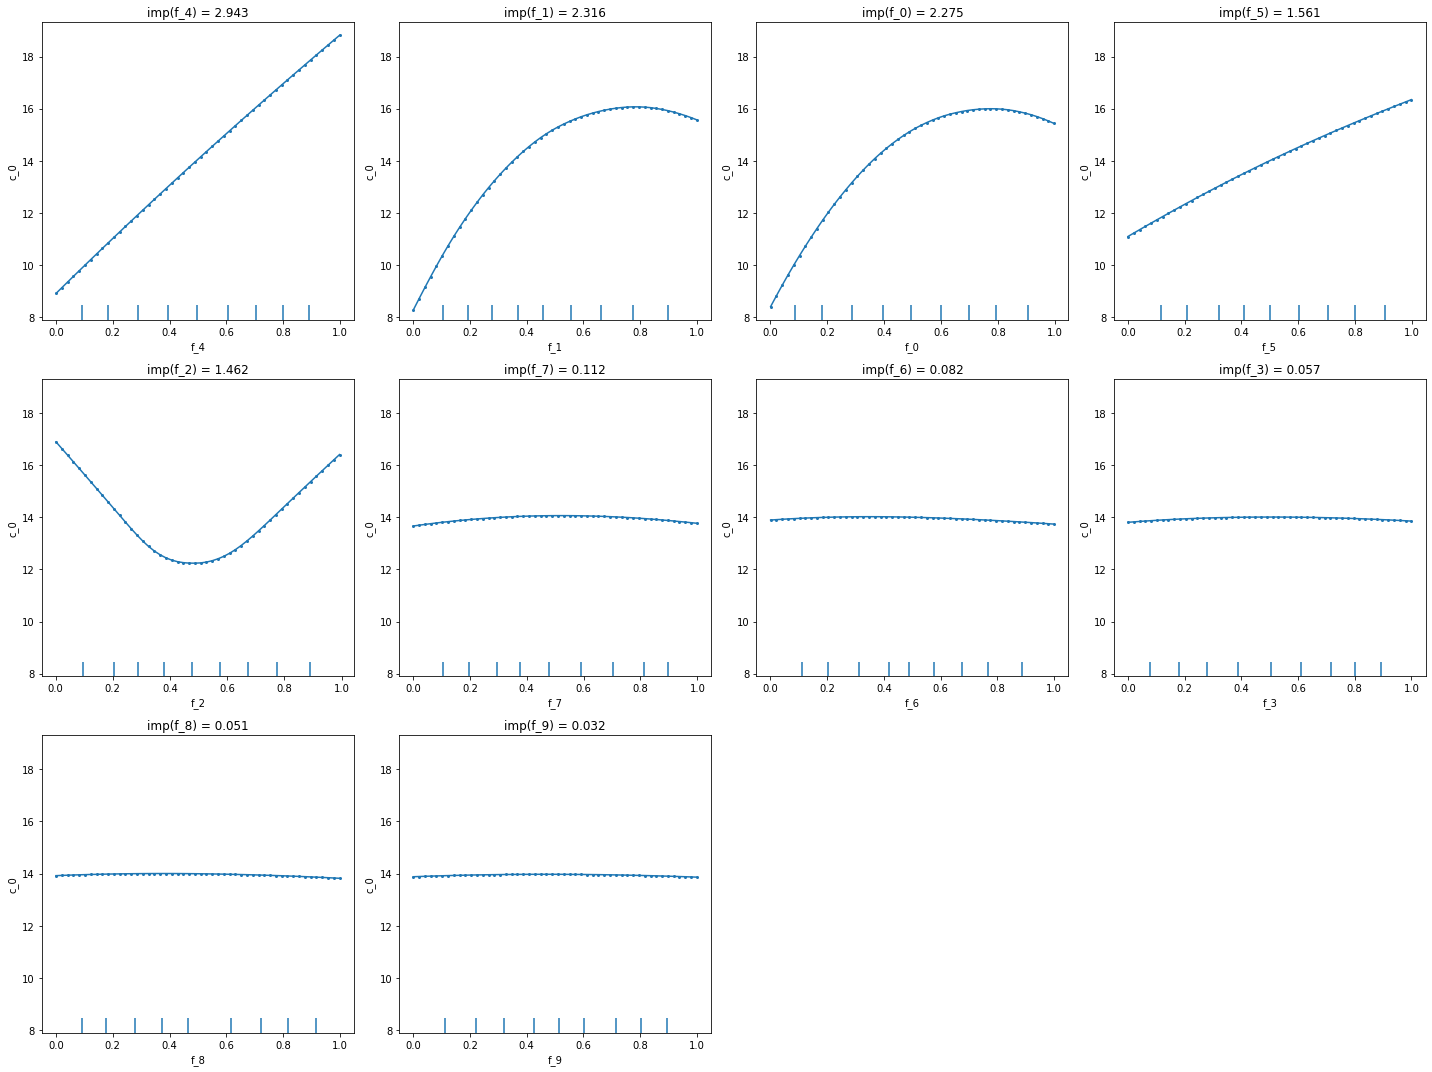

In [17]:
# detailed plots
plot_pd_variance(exp=exp,
                 features='all',
                 n_cols=4,
                 summarise=False,
                 fig_kw={'figwidth': 20, 'figheight': 15});

### Feature interaction

In [18]:
exp = explainer.explain(X=X_train,
                        features=None,
                        method='interaction',
                        grid_resolution=50)

100%|██████████| 45/45 [00:48<00:00,  1.07s/it]


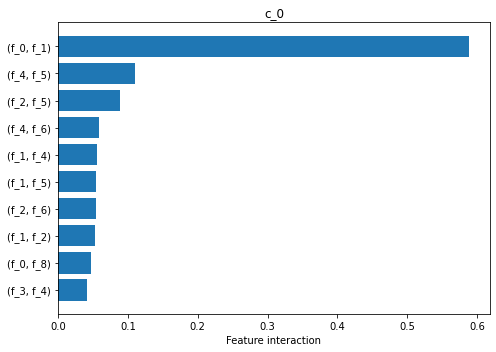

In [9]:
# plot summary
plot_pd_variance(exp=exp,
                 features='all',
                 top_k=10,
                 fig_kw={'figwidth': 7, 'figheight': 5});

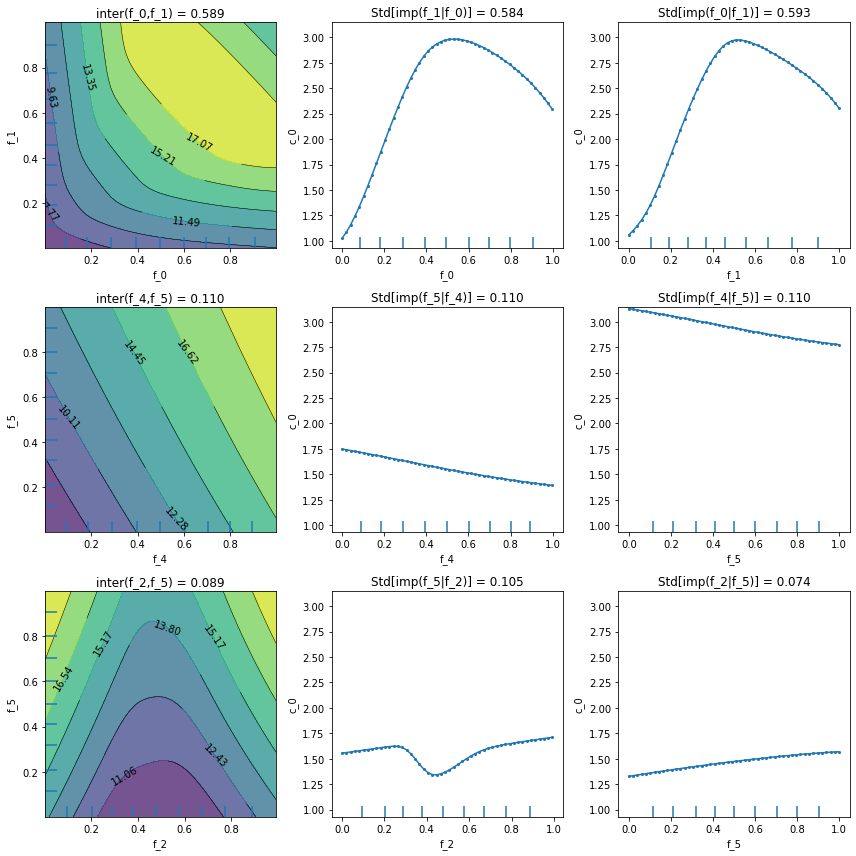

In [10]:
# detailed plots
plot_pd_variance(exp=exp,
                 features='all',
                 summarise=False,
                 top_k=3,
                 n_cols=3,
                 fig_kw={'figwidth': 12, 'figheight': 12});

In [20]:
exp.data.keys()

dict_keys(['feature_deciles', 'pd_values', 'feature_values', 'feature_names', 'feature_importance', 'feature_interaction', 'conditional_importance', 'conditional_importance_values'])